### This program serves to build a Radiative Convective model as part of Climate Dynamics assignment 3.

In [14]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [28]:
# listing of variables:
So = 240 # top of atmosphere radiation (W m−2)
tao_inf = 2.8
rho_0 = 1.2 # density of air at sea level (kg m-3)
#rho_a = rho_a0*exp(-z/H)
h = 3 # km 
sigma = 5.67e-8 #Wm−2K−4
LR = 0.6 * (-9.81/1004) #K m−1
k = 37.0 # Wm−2K−1
Cp = 1004 # J kg−1K−1
rho = rho_0*np.exp(-z/H)
H = 8 #km 

In [16]:
# variables we have to play with:
z = 10 #km 

In [25]:
A = 'bouy'

In [26]:
a = 5

In [27]:
a == A

False

In [17]:
T_surf = ((So/sigma)*(0.5*(tao_inf*np.exp(-z/H)) + 1))**(1/4)

In [19]:
T_test = []

for z in range(0, 20):
    T_test_calc = ((So/sigma)*(0.5*(tao_inf*np.exp(-z/H)) + 1))**(1/4)
    T_test.append(T_test_calc)

In [20]:
tao_values = np.arange(0, 20, 1)
tao_values.shape

(20,)

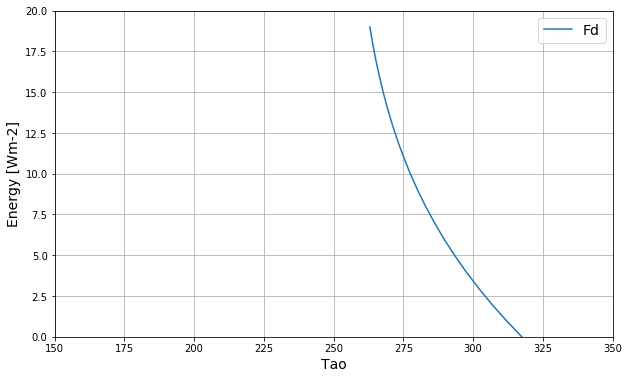

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(T_test, tao_values)
#plt.plot(T_surf, tao_values)
#ax.set_title('Optical Thickness', fontsize = 16)
ax.set_xlabel('Tao', fontsize = 14)
ax.set_ylabel('Energy [Wm-2]', fontsize = 14);
ax.grid()
ax.set_ylim(0, 20);
ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax.legend(['Fd'], fontsize = 14)



In [77]:
# 1.a.i
z = 10
tao_z = tao_inf*(1 - np.exp(-z/h))
tao_z

2.700112818627693

In [78]:
# 1.a.ii
tao_m = np.linspace(0,tao_z, 11)
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [79]:
# solve for z from tao_z equation

z_m = []

for z in np.linspace(0, 2.7, 11):
    z_calc_test = -h*(np.log(1 - (z/tao_inf)))
    z_m.append(z_calc_test)
    
z_m

[-0.0,
 0.3042003433251881,
 0.6427638116908911,
 1.0244543353342719,
 1.46188537906739,
 1.9741675822460258,
 2.5923149361107547,
 3.3717902899571994,
 4.427719559428735,
 6.071615071575079,
 9.996613530525622]

In [80]:
# 1.a.iii
# compute T at each height (z_m) of optical thickness (tao_m) within this mixed layer 

T_m = []

for tao_z in np.linspace(0, 2.7, 11):
    tao_z_calc_test = -h*(np.log(1 - (tao_z/tao_inf)))
    T = ((So/sigma)*(0.5*(tao_inf*np.exp(-tao_z_calc_test/h)) + 0.5))**(1/4)
    T_m.append(T)
    
T_m

# this is radiative eq temp, now want mixed layer linear decreasing T

[299.46456866315015,
 293.99721955116223,
 288.20661643549477,
 282.0443108023896,
 275.44936327242715,
 268.34349252834426,
 260.6235584599731,
 252.14937069504956,
 242.72276389446688,
 232.04899325825053,
 219.65835054401276]

In [81]:
T_m[-1] + LR*(z_m-z_m[-1])*1000

array([278.26399521, 276.48060554, 274.49576035, 272.25808065,
       269.69361937, 266.69033944, 263.06641979, 258.49670671,
       252.30626878, 242.66884948, 219.65835054])

In [82]:
# 1.a.iv.
# define f_d

Fd = So*(0.5*(tao_inf - tao_m[-1]))
Fd

11.986461764676815

In [84]:
LHS = Fd*np.exp(tao_z + tao_m[-1]) 

In [ ]:
for j in tao_m:
    for i in T_m:
    RHS = 0.5*((sigma*(i**4)*np.exp(j - tao_m[-1])) + (sigma*((i+1)**4)*np.exp((j + 1) - tao_m)))